In [75]:
from common import NWSL, Data, Colors, Fonts, Images, add_twitter_handle
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv("stadiums.csv")
df.head()

,stadium,city,state,games,goals,avg_goals,capacity,max_attendance,elevation,surface
0,Providence Park,Portland,OR,133,411,3.090226,25218.0,25218.0,78,turf
1,Shell Energy Stadium,Houston,TX,115,305,2.652174,22039.0,21284.0,45,grass
2,SeatGeek Stadium,Bridgeview,IL,95,251,2.642105,20000.0,17388.0,613,grass
3,WakeMed Soccer Park,Cary,NC,86,245,2.848837,10000.0,10434.0,495,grass
4,Exploria Stadium,Orlando,FL,79,220,2.784810,25500.0,14452.0,108,grass


In [96]:
df["label"] = df.apply(lambda row: row["stadium"] + " (" + row["state"] + ")", axis=1)

<Figure size 864x864 with 0 Axes>

<Figure size 4800x4800 with 0 Axes>

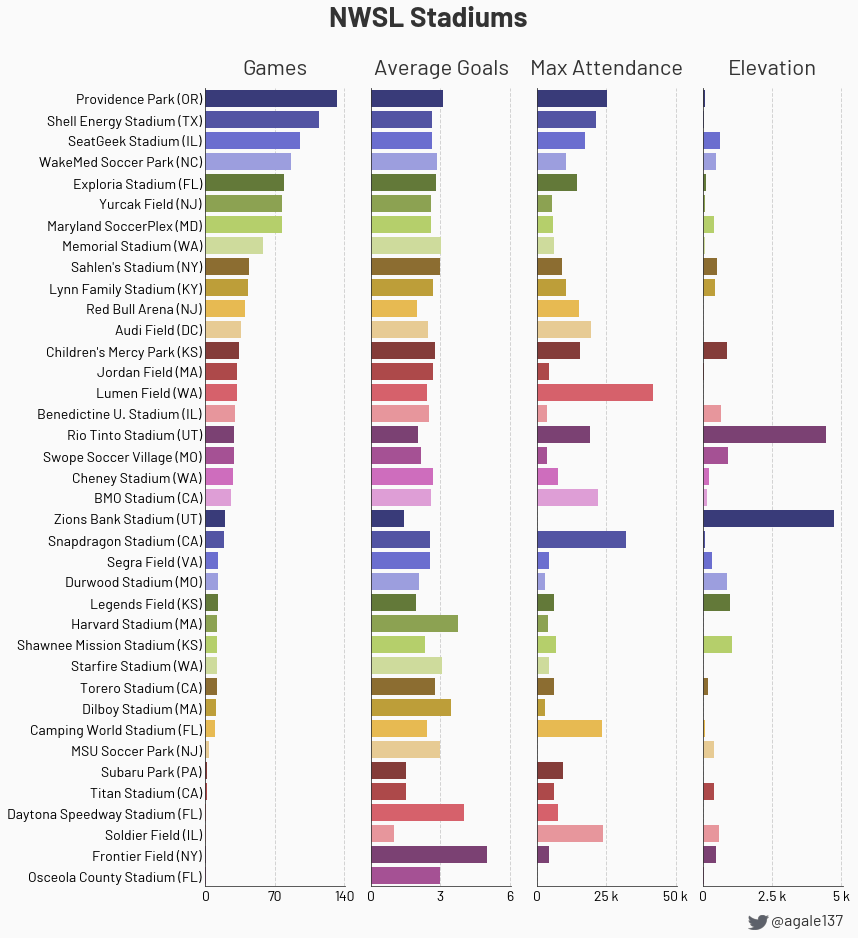

In [109]:
# General
plt.clf()
plt.rcParams["figure.figsize"] = (12, 12)
plt.figure(dpi=400, facecolor=Colors.WHITE)

COLUMNS = ["games", "avg_goals", "max_attendance", "elevation"]
TITLES = ["Games", "Average Goals", "Max Attendance", "Elevation"]
LIMITS = [[0, 70, 140], [0, 3, 6], [0, 25000, 50000], [0, 2500, 5000]]
ROWS = 1
COLS = len(COLUMNS)
fig, axs = plt.subplots(ROWS, COLS)
fig.patch.set_facecolor(Colors.WHITE)

for i, col in enumerate(COLUMNS):
    ax = axs[i]
    ax.set_facecolor(Colors.WHITE)

    # Plot data
    my_cmap = plt.cm.get_cmap('tab20b')
    colors = my_cmap(list(map(lambda x: x % 20, range(0, len(df.index)))))
    ax.barh(df["label"], df[col], color=colors)

    # Title
    ax.set_title(TITLES[i], fontproperties=Fonts.BARLOW, size=22, color=Colors.BLACK, y=1.01)

    # Limits
    ax.set_ylim([len(df.index) - 0.5, -0.5])
    ax.set_xlim([0, LIMITS[i][-1]*1.01])
    
    # Ticks
    if i > 1:
        ax.xaxis.set_major_formatter(ticker.EngFormatter())
    for label in ax.get_yticklabels() + ax.get_xticklabels():
        label.set_fontproperties(Fonts.BARLOW)
    ax.tick_params(axis="both", which="both", length=0, labelsize=14)
    if i > 0:
        ax.set_yticks([])
    ax.set_xticks(LIMITS[i])

    # Axes
    ax.spines[["right", "top"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color(Colors.BLACK)
    ax.set_axisbelow(True)
    ax.grid(axis="x", which="both", ls="--", color=Colors.LIGHT_GRAY, linewidth=1)
    
# Proper spacing between subplots
fig.tight_layout()

# Titles
plt.suptitle(
    "NWSL Stadiums",
    x=0.5,
    y=1.05,
    fontproperties=Fonts.BARLOW_BOLD,
    fontsize=28,
    color=Colors.BLACK,
)

add_twitter_handle(fig, x=0.87, y=-0.02, fs=16, w=0.02)

# Save image
plt.savefig(
    "images/stadiums_bars.png",
    bbox_inches="tight",
    pad_inches=0.5,
    dpi=400,
)